In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# dropping instant column
bikes = bikes.drop(['instant'],axis=1)
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [4]:
bikes.shape

(730, 15)

In [5]:
# Checking for any null values in columns
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [6]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Renaming the columns for better understanding
bikes.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'total_users'},inplace=True)
bikes.head(3)

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_users
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [8]:
# Mapping season
bikes.season = bikes.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikes.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [9]:
# Mapping Month
bikes.month = bikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Mapping Weekday
bikes.weekday = bikes.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'}) 

# Mapping Weathersit
bikes.weathersit = bikes.weathersit.map({1:'Clear',2:'Moist or Cloudy',3:'Light Rain/Snow',4:'Heavy Rain/Snow'})

In [10]:
bikes.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_users
0,01-01-2018,Spring,0,Jan,0,Mon,0,Moist or Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,Spring,0,Jan,0,Tue,0,Moist or Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikes.dtypes

dteday          object
season          object
year             int64
month           object
holiday          int64
weekday         object
workingday       int64
weathersit      object
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
total_users      int64
dtype: object

Dropping casual and registerd vairables because total_users vairable is the sum of both those vairables.

In [12]:
# Dropping dteday, casual, registered, atemp
bikes = bikes.drop(['dteday','casual','registered','atemp'],axis=1)
bikes.sample(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,total_users
329,Winter,0,Nov,0,Mon,0,Clear,15.409153,68.1667,4.584194,3068
594,Fall,1,Aug,0,Mon,0,Clear,27.811653,60.3333,11.917089,7865


### Data Visualisation

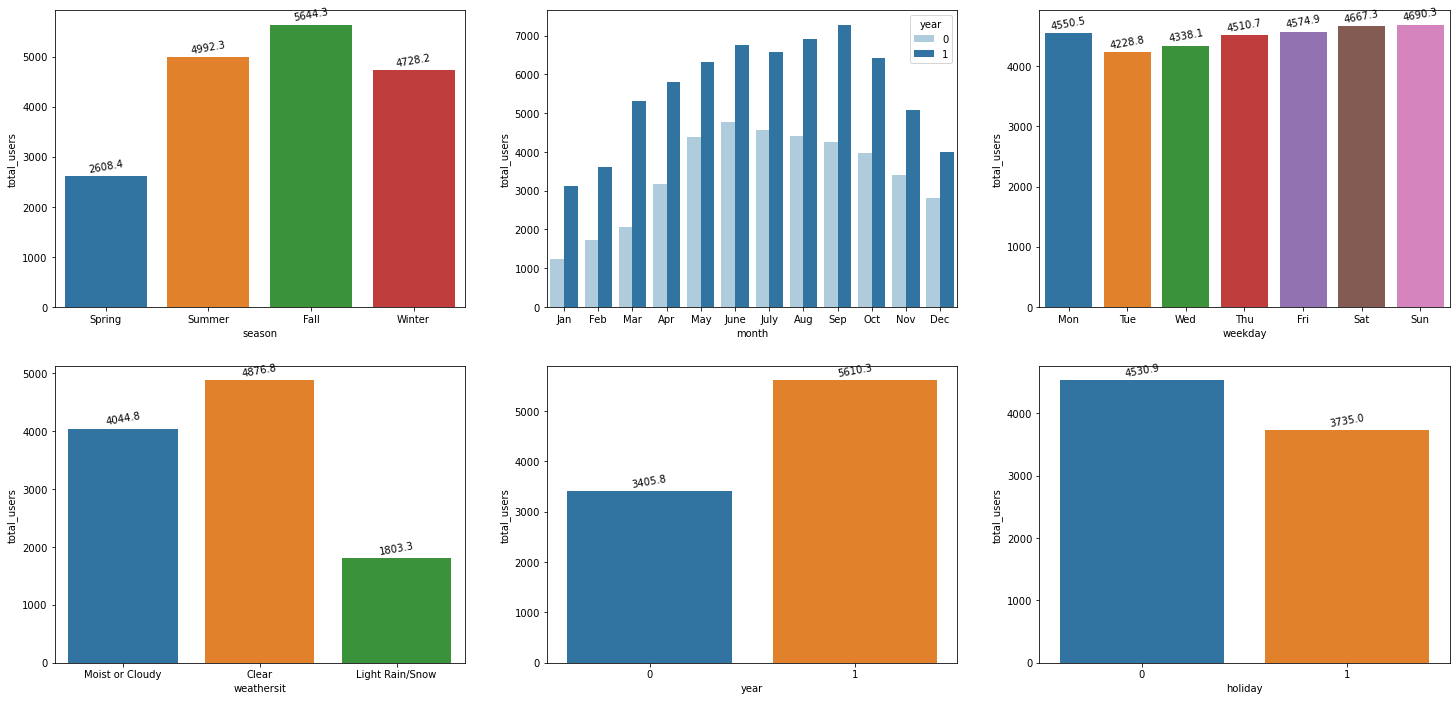

In [13]:
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
ax = sns.barplot(x='season',y='total_users',data=bikes,ci=None)
for p in ax.patches:
    ax.annotate("%.1f"%p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()),
                ha = 'center', va='center', rotation = 10, xytext= (0,10),
                textcoords = 'offset points')
ax = plt.subplot(2,3,2)
sns.barplot(x='month',y='total_users',data=bikes,ci=None,hue='year',palette = 'Paired')

ax = plt.subplot(2,3,3)
sns.barplot(x='weekday',y='total_users',data=bikes,ci=None)
for p in ax.patches:
    ax.annotate("%.1f"%p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()),
                ha = 'center', va='center', rotation = 10, xytext= (0,10),
                textcoords = 'offset points')
ax = plt.subplot(2,3,4)
sns.barplot(x='weathersit',y='total_users',data=bikes,ci=None)
for p in ax.patches:
    ax.annotate("%.1f"%p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()),
                ha = 'center', va='center', rotation = 10, xytext= (0,10),
                textcoords = 'offset points')
ax = plt.subplot(2,3,5)
sns.barplot(x='year',y='total_users',data=bikes,ci=None)
for p in ax.patches:
    ax.annotate("%.1f"%p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()),
                ha = 'center', va='center', rotation = 10, xytext= (0,10),
                textcoords = 'offset points')
ax = plt.subplot(2,3,6)
sns.barplot(x='holiday',y='total_users',data=bikes,ci=None)
for p in ax.patches:
    ax.annotate("%.1f"%p.get_height(),(p.get_x() + p.get_width()/2.,p.get_height()),
                ha = 'center', va='center', rotation = 10, xytext= (0,10),
                textcoords = 'offset points')
plt.show()

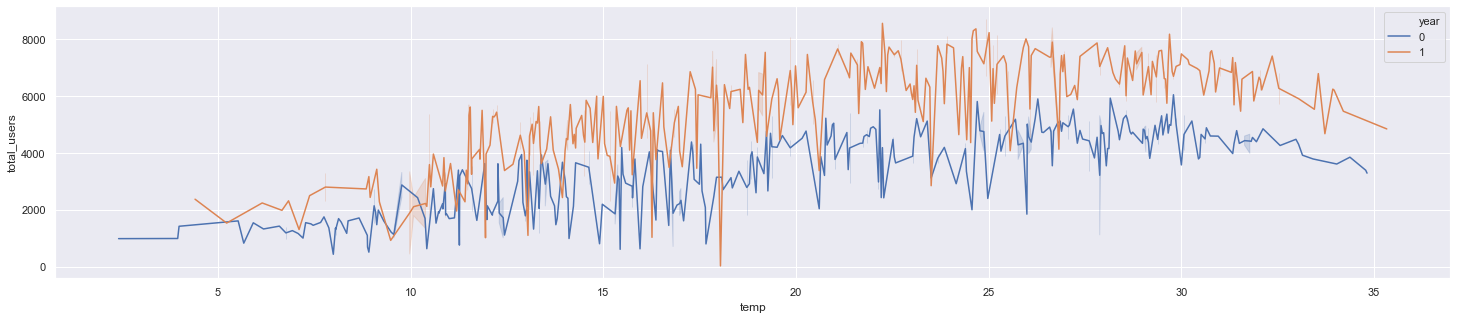

In [14]:
sns.set(rc = {'figure.figsize':(25,5)})
sns.lineplot(x = 'temp', y='total_users', data=bikes, hue='year')
plt.show()

In [15]:
bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'total_users'],
      dtype='object')

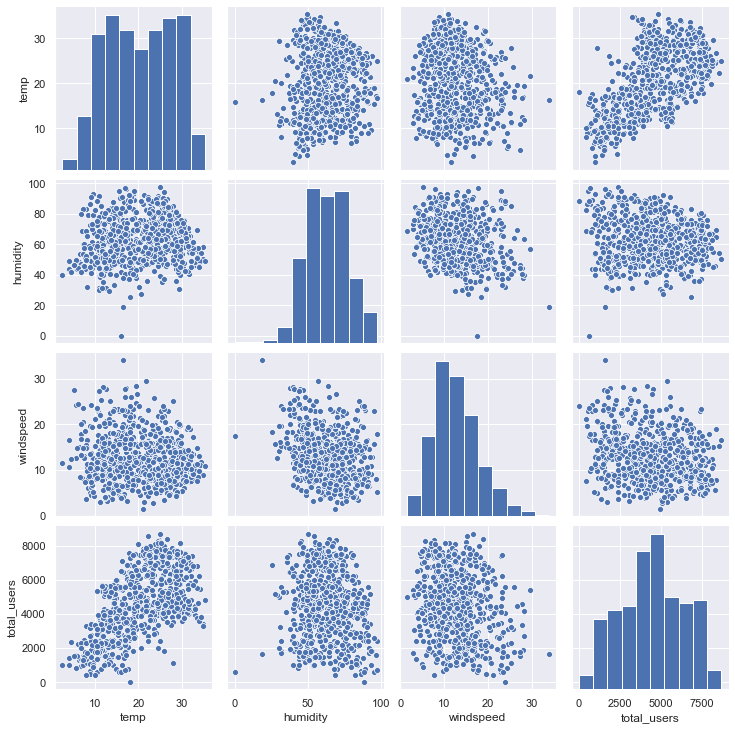

In [16]:
# pair plot for numeric vairables
sns.pairplot(vars=['temp','humidity','windspeed','total_users'],data = bikes)
plt.show()

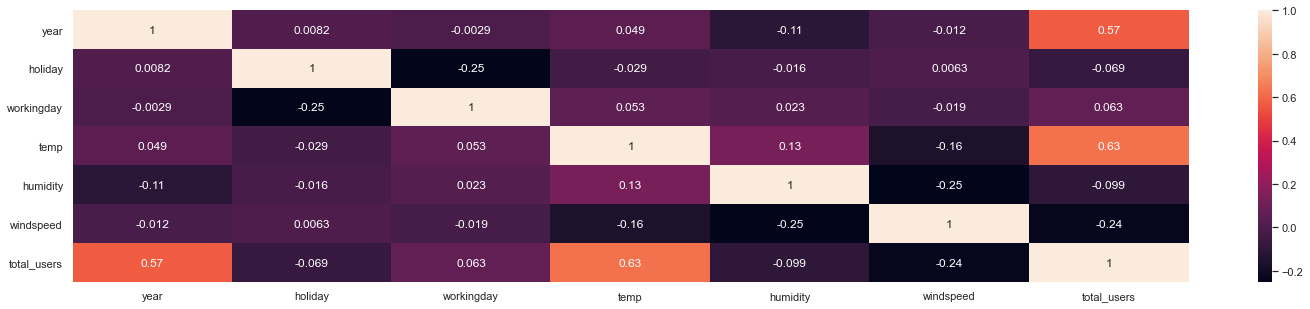

In [17]:
# Heatmap to see correlation between vairables

sns.heatmap(bikes.corr(),annot=True)
plt.show()

In [18]:
bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'total_users'],
      dtype='object')

### Data Preparation

In [19]:
# Get Dummy vairables for month, weathersit, weekday, season
season = pd.get_dummies(bikes.season, drop_first=True)
month = pd.get_dummies(bikes.month, drop_first=True)
weathersit = pd.get_dummies(bikes.weathersit, drop_first=True)
weekday = pd.get_dummies(bikes.weekday, drop_first=True)

In [20]:
# Concat the dummy viarbles to original data frame
bikes = pd.concat([season,month,weathersit,weekday,bikes],axis=1)
pd.set_option('display.max_columns',None)
bikes.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Rain/Snow,Moist or Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,total_users
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,Spring,0,Jan,0,Mon,0,Moist or Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,Spring,0,Jan,0,Tue,0,Moist or Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [21]:
# Dropping Season, month , weekday, weathersit
bikes.drop(['season','month','weekday','weathersit'], axis=1, inplace=True)
bikes.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Rain/Snow,Moist or Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,year,holiday,workingday,temp,humidity,windspeed,total_users
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


### Splitting data into Training and Test datasets

In [22]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the vairables

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['temp','humidity','windspeed','total_users']

#Fit on data
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

<ipython-input-23-95449749384f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
C:\Users\Deepak\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Rain/Snow,Moist or Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,year,holiday,workingday,temp,humidity,windspeed,total_users
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [24]:
bikes_train.describe()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Rain/Snow,Moist or Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,year,holiday,workingday,temp,humidity,windspeed,total_users
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing train data set to x and y for modeling

In [25]:
y_train = bikes_train.pop('total_users')
X_train = bikes_train

### Building Linear model

Using RFE to get top 15 variables and build model with statsmodel for detailed statistics

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Light Rain/Snow', True, 1),
 ('Moist or Cloudy', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 11),
 ('Thu', False, 9),
 ('Tue', False, 7),
 ('Wed', False, 8),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [28]:
col  = X_train.columns[rfe.support_]
col

Index(['Spring', 'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Light Rain/Snow',
       'Moist or Cloudy', 'Mon', 'year', 'holiday', 'workingday', 'temp',
       'humidity', 'windspeed'],
      dtype='object')

In [29]:
X_train_rfe = X_train[col]

In [30]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.31e-191
Time:                        08:03:46   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036     

### Checking VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'],axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

vif

,Features,VIF
13,humidity,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,Spring,4.53
2,Winter,3.48
1,Summer,2.84
7,Moist or Cloudy,2.29
9,year,2.09
8,Mon,1.98


Jan has high p - value, So drop Jan and build model again and calculate VIF

In [33]:
#dropping jan vairable
X_train_new = X_train_rfe.drop(['Jan'],axis=1)
X_train_new

,Spring,Summer,Winter,July,Sep,Light Rain/Snow,Moist or Cloudy,Mon,year,holiday,workingday,temp,humidity,windspeed
653,0,0,1,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,1,1,0,0,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0,0,0,0,1,0,1,0,1,0.824514,0.605840,0.355596
578,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,0,0,0,1,1,0,0,0,0.248216,0.577930,0.431816


In [34]:
X_train_new = sm.add_constant(X_train_new)

In [35]:
X_train_new.head()

,const,Spring,Summer,Winter,July,Sep,Light Rain/Snow,Moist or Cloudy,Mon,year,holiday,workingday,temp,humidity,windspeed
653,1.0,0,0,1,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,1,1,0,0,0.395666,0.504508,0.188475


In [36]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.13e-191
Time:                        08:03:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2394      0.036     

In [37]:
X_train_new = X_train_new.drop(['const'],axis=1)

In [38]:
vif1 = pd.DataFrame()
vif1['Features']  = X_train_new.columns
vif1['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif1['vif'] = round(vif1['vif'],2)

vif1 = vif1.sort_values(by = 'vif', ascending = False)

vif1

,Features,vif
12,humidity,28.49
11,temp,16.97
10,workingday,5.28
13,windspeed,4.72
0,Spring,4.24
2,Winter,3.44
1,Summer,2.83
6,Moist or Cloudy,2.28
8,year,2.08
7,Mon,1.97


In [39]:
# Dropping beacuse of high vif values
X_train_new = X_train_new.drop(['humidity'],axis = 1)

In [40]:
# Build the model again

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          5.73e-189
Time:                        08:03:47   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1577      0.031     

In [41]:
# Calculate VIF
X_train_new = X_train_new.drop(['const'],axis=1)
vif2 = pd.DataFrame()
vif2['Features'] = X_train_new.columns
vif2['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif2['vif'] = round(vif2['vif'],2)
vif2 = vif2.sort_values( by ='vif', ascending = False)

vif2

,Features,vif
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
0,Spring,2.49
1,Summer,2.32
8,year,2.07
2,Winter,1.99
7,Mon,1.96
3,July,1.58
6,Moist or Cloudy,1.56


In [42]:
# Drop holiday viarables for its high p value
X_train_new = X_train_new.drop(['holiday'],axis=1)

In [43]:
# Create  model again

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          3.28e-189
Time:                        08:03:47   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1493      0.031     

In [44]:
# Calculate VIF
X_train_new = X_train_new.drop(['const'],axis=1)

In [45]:
vif3 = pd.DataFrame()
vif3['Features'] = X_train_new.columns
vif3['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif3['vif'] = round(vif3['vif'],2)
vif3  = vif3.sort_values( by ='vif', ascending = False)
vif3

,Features,vif
10,temp,6.73
9,workingday,4.65
11,windspeed,4.64
0,Spring,2.38
1,Summer,2.31
8,year,2.07
2,Winter,1.92
7,Mon,1.83
3,July,1.58
6,Moist or Cloudy,1.56


In [46]:
# Let's drop july
X_train_new = X_train_new.drop(['July'],axis=1)

In [47]:
# Build model again
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          6.86e-189
Time:                        08:03:47   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1405      0.031     

In [48]:
# Calcuate VIF
X_train_new = X_train_new.drop(['const'],axis=1)
vif4 = pd.DataFrame()

In [49]:
vif4['Features'] = X_train_new.columns
vif4['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif4['vif'] = round(vif4['vif'],2)
vif4 = vif4.sort_values(by='vif',ascending = False)
vif4

,Features,vif
9,temp,5.48
8,workingday,4.65
10,windspeed,4.63
0,Spring,2.30
7,year,2.07
1,Summer,1.99
6,Mon,1.83
2,Winter,1.77
5,Moist or Cloudy,1.56
3,Sep,1.23


In [50]:
# Let's drop windspeed, Because it is the vairable with high vif which is somewhat insigificant to the analysis
X_train_new = X_train_new.drop(['windspeed'],axis=1)

In [51]:
X_train_new = sm.add_constant(X_train_new)

In [52]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.55e-182
Time:                        08:03:47   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0901      0.030     

In [53]:
# Calcuate VIF
X_train_new = X_train_new.drop(['const'],axis=1)


In [54]:
vif5 = pd.DataFrame()

In [55]:
X_train_new.head(2)

,Spring,Summer,Winter,Sep,Light Rain/Snow,Moist or Cloudy,Mon,year,workingday,temp
653,0,0,1,0,0,0,0,1,1,0.509887
576,0,0,0,0,0,0,0,1,1,0.815169


In [56]:
vif5['Features'] = X_train_new.columns
vif5['vif'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif5['vif'] = round(vif5['vif'],2)
vif5 = vif5.sort_values(by='vif',ascending = False)
vif5

,Features,vif
9,temp,4.72
8,workingday,4.63
7,year,2.07
6,Mon,1.81
1,Summer,1.74
0,Spring,1.70
2,Winter,1.59
5,Moist or Cloudy,1.56
3,Sep,1.23
4,Light Rain/Snow,1.07


In [57]:
X_train_new.columns

Index(['Spring', 'Summer', 'Winter', 'Sep', 'Light Rain/Snow',
       'Moist or Cloudy', 'Mon', 'year', 'workingday', 'temp'],
      dtype='object')

### Residual analysis
    -Checking if error terms are normally distributed

In [58]:
X_train_new.head()

,Spring,Summer,Winter,Sep,Light Rain/Snow,Moist or Cloudy,Mon,year,workingday,temp
653,0,0,1,0,0,0,0,1,1,0.509887
576,0,0,0,0,0,0,0,1,1,0.815169
426,1,0,0,0,0,1,1,1,0,0.442393
728,1,0,0,0,0,0,0,1,0,0.245101
482,0,1,0,0,0,1,1,1,0,0.395666


In [59]:
X_train_new = sm.add_constant(X_train_new)
y_train_pred = lm.predict(X_train_new)

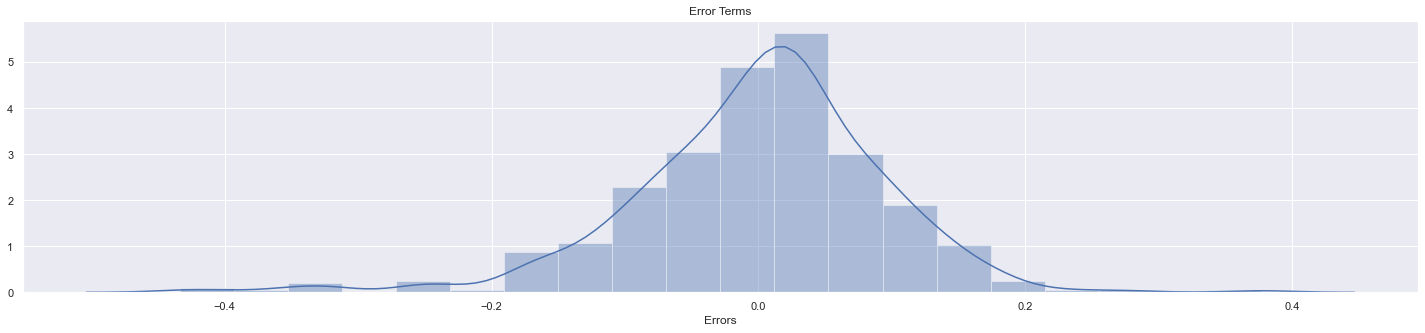

In [60]:
#plot histogram for error term

sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

### Predictions

In [61]:
# scaling test set
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

<ipython-input-61-44d71ff3b36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
C:\Users\Deepak\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Rain/Snow,Moist or Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,year,holiday,workingday,temp,humidity,windspeed,total_users
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [62]:
# Divide X test and y test

y_test = bikes_test.pop('total_users')
X_test= bikes_test

In [63]:
X_test.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Light Rain/Snow,Moist or Cloudy,Mon,Sat,Sun,Thu,Tue,Wed,year,holiday,workingday,temp,humidity,windspeed
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.831783,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.511964,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [64]:
# Dropping coloumsn in X_test based on our model
X_train_new = X_train_new.drop(['const'],axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new

,Spring,Summer,Winter,Sep,Light Rain/Snow,Moist or Cloudy,Mon,year,workingday,temp
184,0,0,0,0,0,1,0,0,0,0.831783
535,0,1,0,0,0,0,0,1,1,0.901354
299,0,0,1,0,0,1,0,0,1,0.511964
221,0,0,0,0,0,0,0,0,1,0.881625
152,0,1,0,0,0,0,0,0,1,0.817246
...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0,0,1,0,1,0,0.257562
702,0,0,1,0,0,0,0,1,1,0.519232
127,0,1,0,0,0,0,0,0,0,0.584649
640,0,0,1,0,0,1,0,1,1,0.745598


In [65]:
# Adding constant
X_train_new = sm.add_constant(X_train_new)
X_test_new = sm.add_constant(X_test_new)

In [66]:
y_pred = lm.predict(X_test_new)

### Model evaluation

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8110959585457425

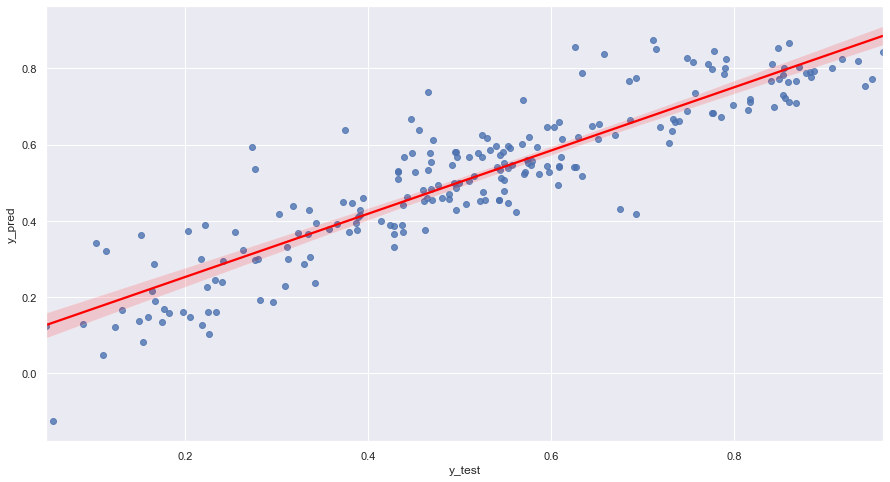

In [68]:
plt.figure(figsize=(15,8))
sns.regplot(x = y_test, y = y_pred, line_kws = {'color':'red'})
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [69]:
X_test_new.columns

Index(['const', 'Spring', 'Summer', 'Winter', 'Sep', 'Light Rain/Snow',
       'Moist or Cloudy', 'Mon', 'year', 'workingday', 'temp'],
      dtype='object')